In [63]:
# Import Libraries
import mesa
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Import Model
from model import Schelling

# PART 1: Analysis Techniques

## Find the wealth distribution of the USA:
We have found that the wealth distribution of the USA closly resembles a log normal distribution [SOURCE]. To test the initial wealth distribution of our agents we have created the function ```test_USA_wealthDist(num_agents, mean, std_dev)```. We used this function to find the appropriate parameters (mean/standard deviation) of the distribution.

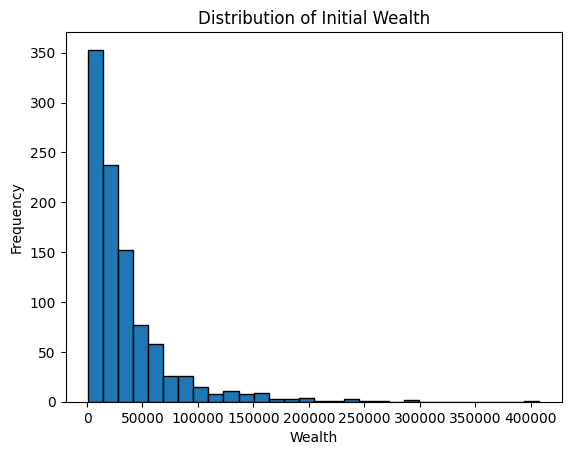

In [64]:
# to interact  with plot
def test_USA_wealthDist(num_agents, mean, std_dev):
    """
    Tests the distribution of initial wealth of agents.
    
    Args:
        num_agents: Number of agents in the model
        mean: Mean of the logarithm of the distribution
        std_dev: Standard deviation of the logarithm of the distribution
    """

    initial_wealth = []
    for i in range(num_agents):
        initial_wealth.append(np.random.lognormal(mean, std_dev))

    # Plotting the distribution
    plt.hist(initial_wealth, bins=30, edgecolor='black')
    plt.xlabel('Wealth')
    plt.ylabel('Frequency')
    plt.title('Distribution of Initial Wealth')
    plt.show()

test_USA_wealthDist(1000, 10.0, 1.0)

## Spatial visualization of the wealth distribution:
We created a 2D heatmap plot, to gain a better understanding of the spatial distribution of wealth over the entire system.
In this heatmap, the yellow cells represent the most wealthy agents, and the darker blue cells represent the poorest agents. If a cell has a wealth of 0, you are right to assume that the cell is empty, as an agent's wealth can never be 0. The function ```plot2D_modelWealth()``` plots the spatial wealth distribution, while the function ```plot2D_modelTypes()``` simply plots the spatial distribution of agent types (regular Schelling model).

In [65]:
def plot2D_modelWealth(model):
    """
    Plots a 2D density heatmap of the model.
        x-axis: x position
        y-axis: y position
        weights: wealth
    """

    # Extract data from model
    x_coords = np.array([agent.pos[0] for agent in model.schedule.agents])  # Agent x coords
    y_coords = np.array([agent.pos[1] for agent in model.schedule.agents])  # Agent y coords
    wealths = np.array([agent.wealth for agent in model.schedule.agents])   # Agent wealths 
    df = pd.DataFrame({'x_pos': x_coords, 'y_pos': y_coords, 'wealth': wealths})

    # Create the 2D density heatmap
    fig = px.density_heatmap(df, x='x_pos', y='y_pos', z='wealth', nbinsx=model.width, nbinsy=model.height)

    # Set axis labels
    fig.update_layout(
        height=720, width=720,
        xaxis_title='X pos', yaxis_title='Y pos', 
        coloraxis_colorbar_title='Wealth',
        title=f'Spatial wealth distribution (t={model.schedule.steps})'
    )

    # Show the plot
    fig.show()

def plot2D_modelTypes(model):
    """
    Plots the model as a 2D scatterplot.
        x-axis: x position
        y-axis: y position
        color: agent type
    """

    # Extract data from model
    positions = [agent.pos for agent in model.schedule.agents]
    types = [agent.type for agent in model.schedule.agents]

    # Create the 2D scatterplot
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 9)

    # Define agent colors
    agent_colors = {
        0: {'color': '#FF0000', 'label': 'Agent Type 0'},
        1: {'color': '#00FF00', 'label': 'Agent Type 1'},
        2: {'color': '#0000FF', 'label': 'Agent Type 2'},
        3: {'color': '#FFA500', 'label': 'Agent Type 3'},
        4: {'color': '#FF00FF', 'label': 'Agent Type 4'},
        5: {'color': '#00FFFF', 'label': 'Agent Type 5'},
        6: {'color': '#FFFF00', 'label': 'Agent Type 6'},
        7: {'color': '#800080', 'label': 'Agent Type 7'},
        8: {'color': '#008000', 'label': 'Agent Type 8'},
        9: {'color': '#FFC0CB', 'label': 'Agent Type 9'}
    }
    colors = [agent_colors[agent_type]['color'] for agent_type in types]

    ax.scatter(*zip(*positions), color=colors, s=10)
    ax.set_title(f'Schelling model (t={model.schedule.steps})', fontsize=10, fontweight='bold')
    ax.set_xlabel('X pos', fontsize=10)
    ax.set_ylabel('Y pos', fontsize=10)
    ax.set_xlim([0, model.width])
    ax.set_ylim([0, model.height])

    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

## Wealth distribution over time:
To visualize the evolution of wealth distribution during the model simulation, we implemented the function ```wealth_dist_lineplot```. This function creates a simple line plot of the total wealth of each agent type for each time step of the simulation.  

In [67]:
def wealth_dist_lineplot(model):
    """
    Creates a line plot of the wealth distribution over time.
    """

    # Extract data
    wealth_dist = model.datacollector.get_model_vars_dataframe()['wealth_dist']
    time = np.arange(len(wealth_dist))

    # Define agent colors
    agent_colors = {0: '#FF0000', 1: '#00FF00', 2: '#0000FF', 3: '#FFA500', 4: '#FF00FF', 5: '#00FFFF', 6: '#FFFF00', 7: '#800080', 8: "#008000", 9: "#FFC0CB"}
    colors = [agent_colors[agent_type] for agent_type in wealth_dist[0].keys()]

    # Creating the line plot
    for type in range(model.N):
        plt.plot(time, wealth_dist.apply(lambda x: x[type]), label=f'Agent-type {type}', color=colors[type])    

    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('Wealth')
    plt.title('Wealth distribution over time')
    # Adding a legend
    plt.legend()
    # Displaying the chart
    plt.show()

# PART 2: Experiments
### - Experiment 1: Highly segregated / Large custers (example):

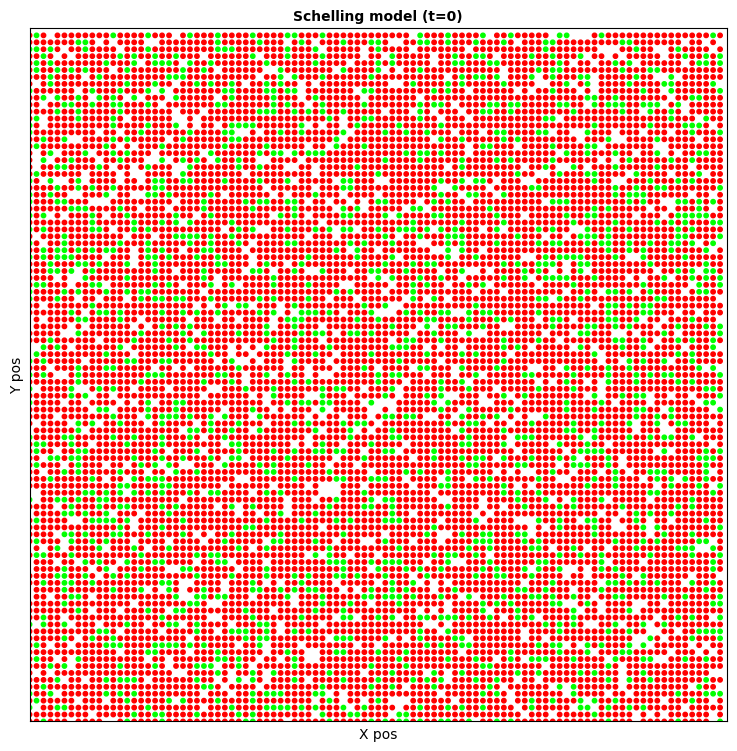

In [68]:
# Define model parameters
heigth, width = 100, 100
density = 0.9
fixed_areas_pc = 0.0
popilation_sizes = [0.8, 0.2]
homophily = 5
cluster_threshold = 4

# Create the model
model = Schelling(heigth, width, density, fixed_areas_pc, popilation_sizes, homophily, cluster_threshold)

# Plot starting type/wealth distribution
plot2D_modelTypes(model)
plot2D_modelWealth(model)

# Run the model
steps = 100
for i in range(steps):
    model.step()


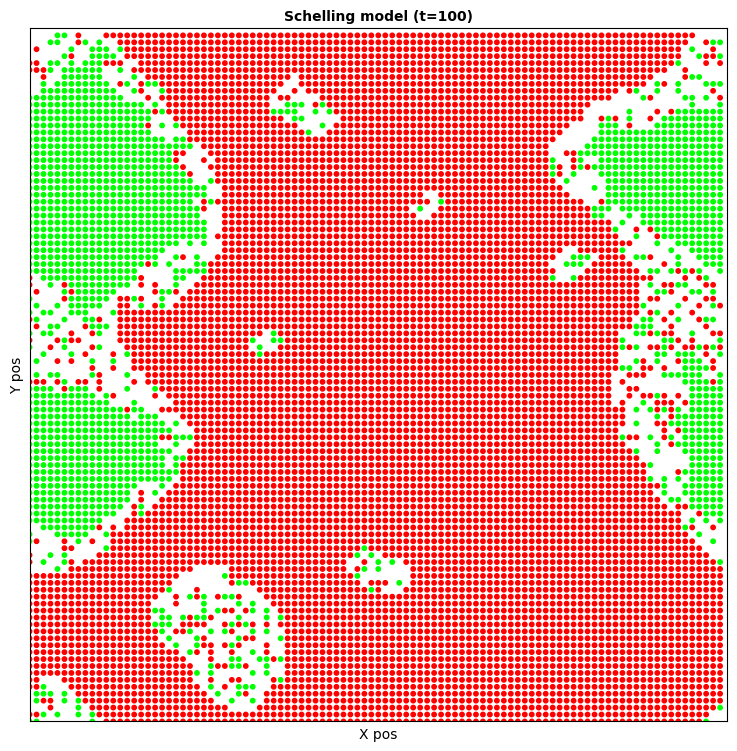

In [69]:
# Plot ending type/wealth distribution
plot2D_modelTypes(model)
plot2D_modelWealth(model)

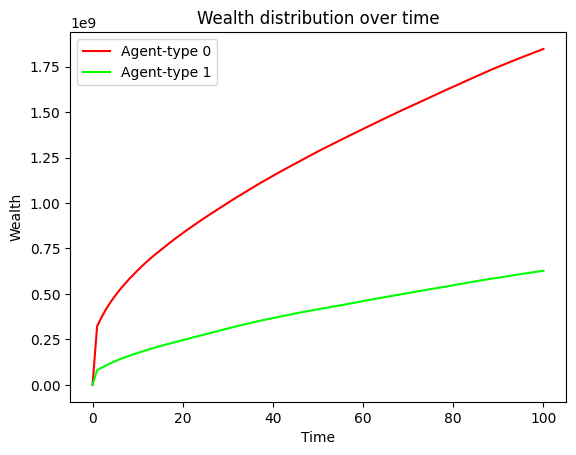

In [70]:
# Plot wealth distribution over time
wealth_dist_lineplot(model)

### - Experiment 2: ...: